In [21]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

166.94857142857143
[[ 147456  876544]
 [ 880640  942080]
 [ 946176 1024000]
 [1044480 2244608]
 [2269184 2314240]
 [2351104 2408448]
 [2433024 3518464]]


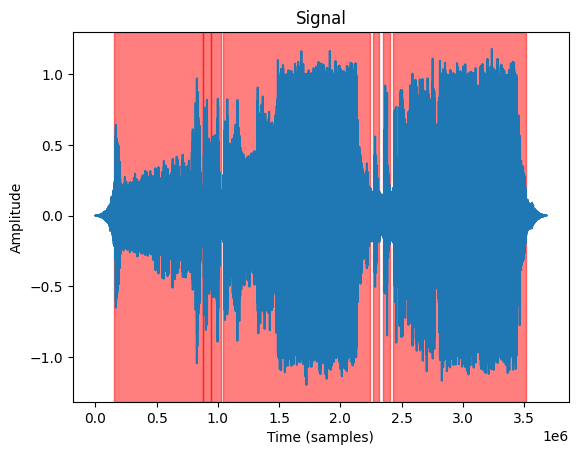

: 

In [74]:
y, sr = librosa.load('../NCSDownload/songs/Disco’s Over - TSU [NCS Release].mp3')
print(len(y)/sr)
interval = librosa.effects.split(y, top_db=20, frame_length=2048*8, hop_length=512*8)
print(interval)
# y = y[interval[0][0]:interval[0][1]]
plt.plot(y)
for a, b in interval:
    plt.axvspan(a, b, color='red', alpha=0.5)
plt.title('Signal')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()

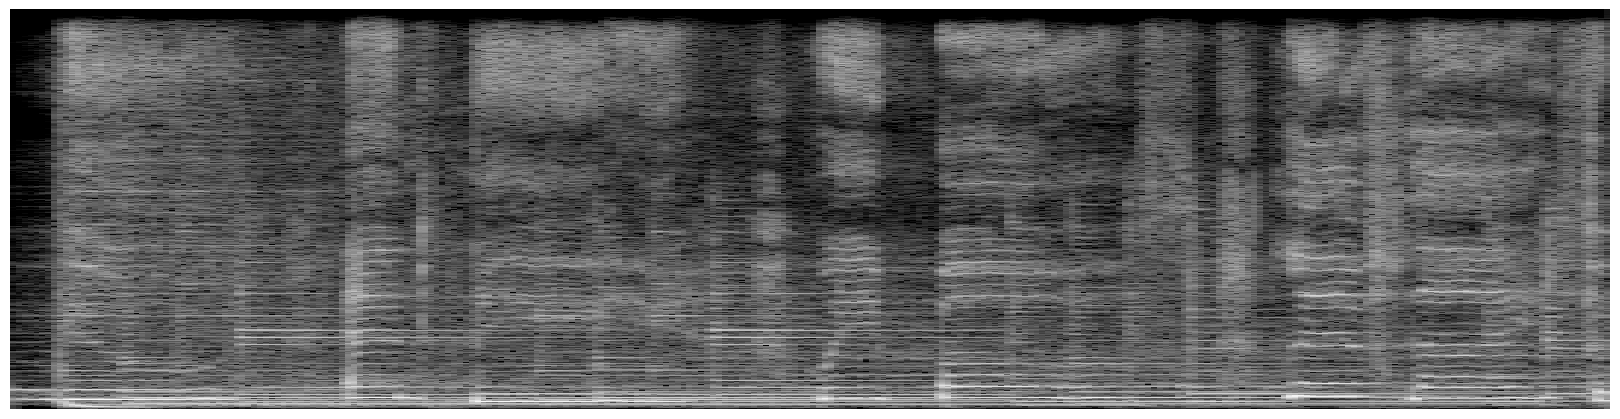

In [34]:
fig = plt.figure(figsize=(16, 4))
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

spec = np.abs(librosa.stft(y, hop_length=512))
spec = librosa.amplitude_to_db(spec, ref=np.max)
librosa.display.specshow(spec, sr=sr, ax=ax, cmap='gray')
plt.axis("off")
ax.set_ylabel(None)
ax.set_xlabel(None)
fig.savefig('fig.png', dpi=256/8)


# original code
# spec = np.abs(librosa.stft(y, hop_length=512))
# spec = librosa.amplitude_to_db(spec, ref=np.max)
# librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log')
# plt.colorbar(format='%+2.0f dB')
# plt.title('Spectrogram')

(64, 345) (16, 345)


Text(0.5, 0, '')

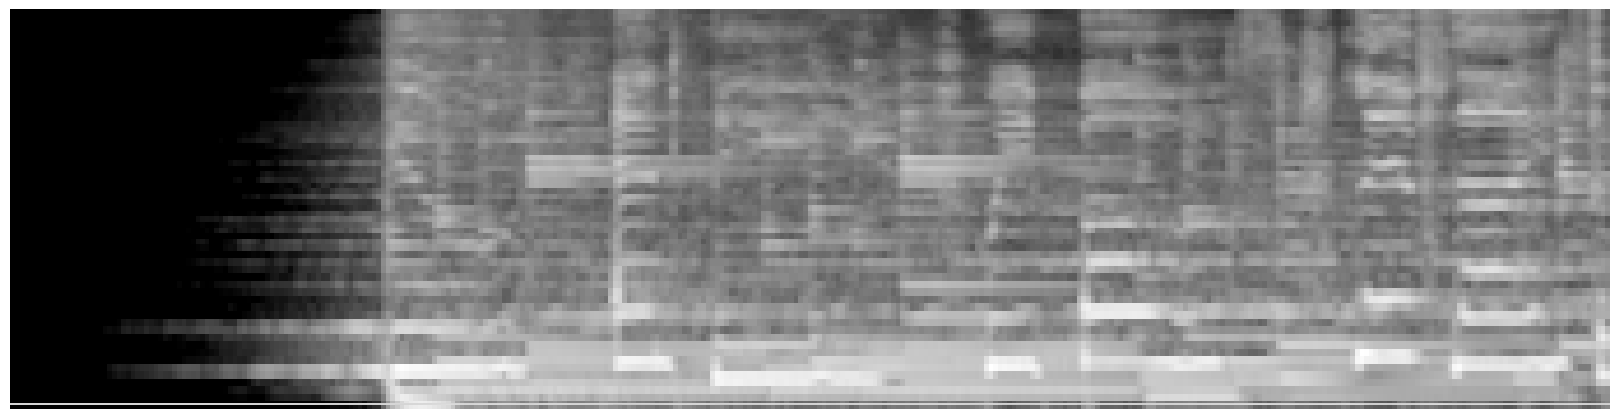

In [49]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=64, fmax=8000)
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=16)

fig = plt.figure(figsize=(16, 4))
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

img = librosa.display.specshow(librosa.power_to_db(S, ref=np.max), x_axis='time', y_axis='mel', fmax=8000, ax=ax, cmap='gray')
librosa.display.specshow(mfcc, x_axis='time', ax=ax, cmap='gray')
print(S.shape, mfcc.shape)

plt.axis("off")
ax.set_ylabel(None)
ax.set_xlabel(None)

# fig, ax = plt.subplots(nrows=2, sharex=True)
# img = librosa.display.specshow(librosa.power_to_db(S, ref=np.max), x_axis='time', y_axis='mel', fmax=8000, ax=ax[0], cmap='gray')
# ax[0].set_title('Mel spectrogram')
# ax[0].label_outer()
# ax[1].set_title('MFCC')
# librosa.display.specshow(mfcc, x_axis='time', ax=ax[1], cmap='gray')
# fig.colorbar(img, ax=ax, format="%+2.f dB")
# plt.show()


